In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [19]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [20]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [21]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [22]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [23]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [24]:
sample_training_images, _ = next(train_data_gen)

In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

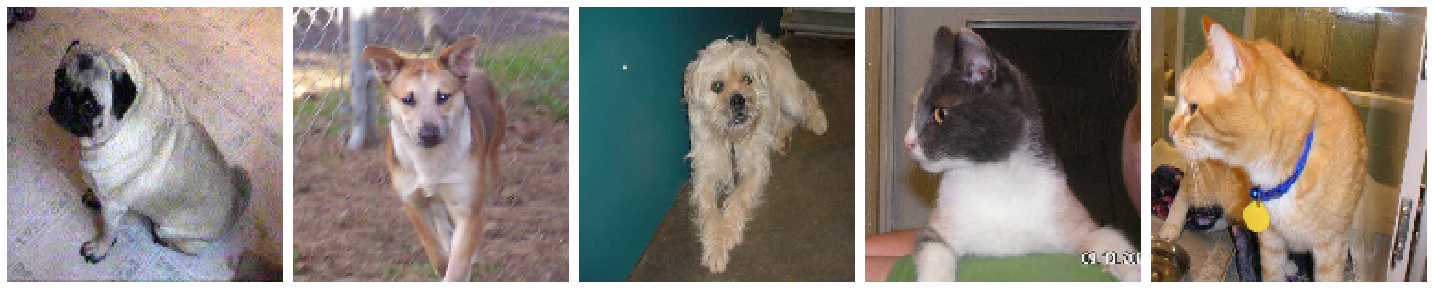

In [26]:
plotImages(sample_training_images[:5])

In [27]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [15]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 168s 11s/step - loss: 1.1262 - accuracy: 0.4995 - val_loss: 0.6915 - val_accuracy: 0.5033
Epoch 2/15
15/15 [==============================] - 147s 10s/step - loss: 0.6861 - accuracy: 0.5075 - val_loss: 0.6756 - val_accuracy: 0.5033
Epoch 3/15
15/15 [==============================] - 130s 9s/step - loss: 0.6603 - accuracy: 0.5479 - val_loss: 0.6723 - val_accuracy: 0.6562
Epoch 4/15
15/15 [==============================] - 146s 10s/step - loss: 0.6273 - accuracy: 0.6127 - val_loss: 0.6276 - val_accuracy: 0.5882
Epoch 5/15
15/15 [==============================] - 122s 8s/step - loss: 0.5852 - accuracy: 0.6656 - val_loss: 0.6439 - val_accuracy: 0.6842
Epoch 6/15
15/15 [==============================] - 126s 8s/step - loss: 0.5320 - accuracy: 0.7318 - val_loss: 0.6074 - val_accuracy: 0.6696
Epoch 7/15
15/15 [==============================] - 103s 7s/step - loss: 0.5114 - accuracy: 0.7313 - val_loss: 0.6232 - val_accuracy: 0.6384
Epoch 8/15

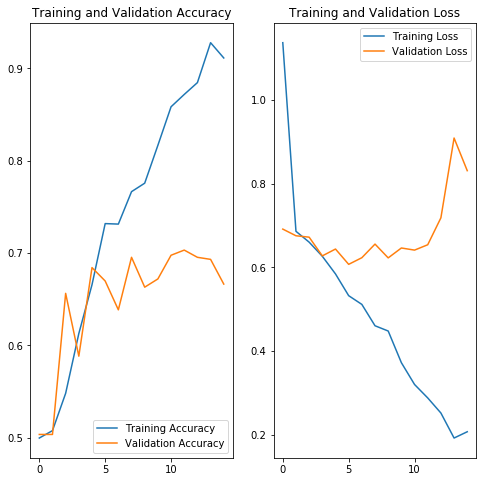

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [18]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


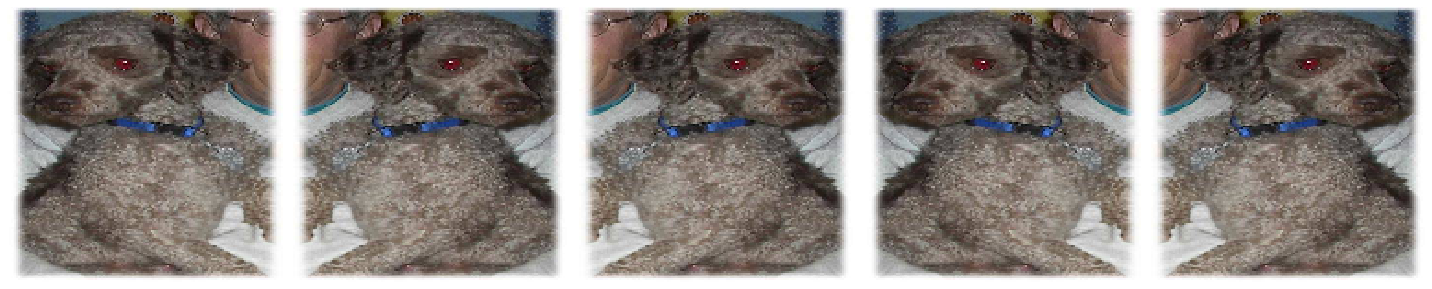

In [23]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [34]:
model.predict(augmented_images[3].reshape(1,150,150,3))

array([[-2.8690732]], dtype=float32)

In [ ]:
class Conv2DKLDropout(layers.Layer):
    def __init__(self, k,l, **kwargs):
        super(Conv2DKLDropout, self).__init__(**kwargs)
        self.k = l
        self.l=l
    def call(self, inputs):
        if self._recreate_conv_op(inputs):
            self._convolution_op = nn_ops.Convolution(
              inputs.get_shape(),
              filter_shape=self.kernel.shape,
              dilation_rate=self.dilation_rate,
              strides=self.strides,
              padding=self._padding_op,
              data_format=self._conv_op_data_format)
        self._build_conv_op_input_shape = inputs.get_shape()

        # Apply causal padding to inputs for Conv1D.
        if self.padding == 'causal' and self.__class__.__name__ == 'Conv1D':
            inputs = array_ops.pad(inputs, self._compute_causal_padding())

        outputs = self._convolution_op(inputs, self.kernel)

        if self.use_bias:
          if self.data_format == 'channels_first':
            if self.rank == 1:
              # nn.bias_add does not accept a 1D input tensor.
              bias = array_ops.reshape(self.bias, (1, self.filters, 1))
              outputs += bias
            else:
              outputs = nn.bias_add(outputs, self.bias, data_format='NCHW')
          else:
            outputs = nn.bias_add(outputs, self.bias, data_format='NHWC')

        if self.activation is not None:
          return self.activation(outputs)
        return outputs

In [3]:
Conv2D

tensorflow.python.keras.layers.convolutional.Conv2D

In [5]:
con=Conv2D(16,3)

In [6]:
con

In [7]:
con.activation

<function tensorflow.python.keras.activations.linear(x)>

In [ ]:
class Conv2DKLDropout(layers.Layer):
    def __init__(self, k,l, **kwargs):
        super(Conv2DKLDropout, self).__init__(**kwargs)
        self.k = l
        self.l=l
    def call(self, inputs):
        old_kern=self.kernel
        

In [56]:
dir(model.layers[2].weights[0])

['SaveSliceInfo',
 '_OverloadAllOperators',
 '_OverloadOperator',
 '_TensorConversionFunction',
 '__abs__',
 '__add__',
 '__and__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__irealdiv__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook

In [61]:
len(model.layers[2].weights[0].value())

3

In [69]:
model.layers[2].weights[0].value()[2][0][0]

<tf.Tensor: id=425, shape=(32,), dtype=float32, numpy=
array([-0.10958093, -0.09000406,  0.09992883, -0.05827237, -0.10290403,
       -0.01989879, -0.05328652,  0.01935881,  0.02963553,  0.03974516,
        0.01626582, -0.07393505, -0.10634287, -0.07210286, -0.09768116,
       -0.04215885,  0.11580572,  0.05135406,  0.11633449, -0.03435058,
        0.00763246, -0.01199421, -0.10673408,  0.03808429, -0.09875572,
       -0.00092327, -0.08783358, -0.08516299, -0.02015282, -0.06304196,
        0.04097145, -0.09762429], dtype=float32)>

In [70]:
model.add_weight

<bound method Layer.add_weight of <tensorflow.python.keras.engine.sequential.Sequential object at 0xb37c2b630>>

In [72]:
model.layers[2].kernel

<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 16, 32) dtype=float32, numpy=
array([[[[ 0.11426429,  0.08750129, -0.04816677, ..., -0.10035282,
           0.00118972,  0.06465433],
         [-0.04012616,  0.11254237,  0.06294643, ..., -0.10059664,
          -0.09879306,  0.04918746],
         [ 0.06284272, -0.03257889, -0.02782439, ...,  0.03736936,
          -0.10513059, -0.01191562],
         ...,
         [ 0.08589769,  0.10717592, -0.0527306 , ..., -0.07967738,
           0.10870285, -0.01669642],
         [-0.08763673,  0.08111768, -0.08046395, ...,  0.01026464,
           0.02683597,  0.00979096],
         [-0.04313233,  0.01307156,  0.06996324, ...,  0.08157975,
          -0.07969967,  0.00601006]],

        [[ 0.00654437,  0.10359498, -0.08182462, ..., -0.09251995,
           0.04917689,  0.02278521],
         [-0.0255422 , -0.0161927 , -0.082872  , ...,  0.03195732,
           0.05104259, -0.00624757],
         [-0.06687039, -0.02365098, -0.03363237, ...,  0.09961475,
         

In [74]:
model.layers[8].kernel

<tf.Variable 'dense_1/kernel:0' shape=(512, 1) dtype=float32, numpy=
array([[ 0.00529588],
       [-0.06059414],
       [-0.05468116],
       [-0.09597684],
       [-0.04165472],
       [-0.03881426],
       [ 0.04544852],
       [ 0.10106381],
       [-0.00984201],
       [ 0.10429914],
       [ 0.06083196],
       [-0.08408868],
       [-0.08469309],
       [ 0.08408228],
       [ 0.02626469],
       [-0.0293106 ],
       [-0.02726907],
       [ 0.09252726],
       [-0.03401718],
       [-0.06979471],
       [-0.05264674],
       [ 0.00389113],
       [ 0.08885413],
       [-0.01049451],
       [-0.01951312],
       [-0.02675459],
       [ 0.01300872],
       [-0.10345676],
       [-0.0591587 ],
       [ 0.06476644],
       [-0.0441152 ],
       [-0.03469809],
       [-0.00714594],
       [ 0.05450515],
       [ 0.0731298 ],
       [ 0.0288331 ],
       [ 0.02198692],
       [-0.07848854],
       [ 0.03920626],
       [ 0.00072733],
       [-0.02245775],
       [-0.02753805],
       

In [75]:
model.layers[2].input_shape

(None, 75, 75, 16)

In [77]:
model.layers[2].output_shape

(None, 75, 75, 32)

In [79]:
model.layers[2].kernel.shape

TensorShape([3, 3, 16, 32])

In [85]:
model.layers[2].kernel.value().transpose

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'transpose'

In [91]:
model.layers[0].input_shape

(None, 150, 150, 3)

In [92]:
model.layers[0].output_shape

(None, 150, 150, 16)

In [93]:
model.layers[0].kernel.shape

TensorShape([3, 3, 3, 16])

In [104]:
model.layers[0].weights[0].shape

TensorShape([3, 3, 3, 16])